Healthcare.
Course-end Project 2

DESCRIPTION

Problem Statement
NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.
The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
Build a model to accurately predict whether the patients in the dataset have diabetes or not.
Dataset Description
The datasets consists of several medical predictor variables and one target variable (Outcome). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more.

 

Variables	Description
Pregnancies	Number of times pregnant
Glucose	Plasma glucose concentration in an oral glucose tolerance test
BloodPressure	Diastolic blood pressure (mm Hg)
SkinThickness	Triceps skinfold thickness (mm)
Insulin	Two hour serum insulin
BMI	Body Mass Index
DiabetesPedigreeFunction	Diabetes pedigree function
Age	Age in years
Outcome	Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0
Project Task: Week 1
Data Exploration:

1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

• Glucose

• BloodPressure

• SkinThickness

• Insulin

• BMI

2. Visually explore these variables using histograms. Treat the missing values accordingly.

3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

Project Task: Week 2
Data Exploration:

1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

3. Perform correlation analysis. Visually explore it using a heat map.

 

Project Task: Week 3
Data Modeling:

1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

 

Project Task: Week 4

Data Modeling:

1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

Data Reporting:

2. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

a. Pie chart to describe the diabetic or non-diabetic population

b. Scatter charts between relevant variables to analyze the relationships

c. Histogram or frequency charts to analyze the distribution of the data

d. Heatmap of correlation analysis among the relevant variables

e. Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.

In [2]:
##importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle
import warnings
warnings.filterwarnings('ignore')

pd.set_option('max_columns', 90)
pd.set_option('max_rows', 90)
plt.style.use('bmh')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [3]:
####understanding data
diabetes_df = pd.read_csv('health care diabetes.csv')

In [4]:
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
diabetes_df.shape

(768, 9)

In [6]:
diabetes_df.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627  

In [7]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
diabetes_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [10]:
diabetes_df.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [11]:
diabetes_df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

### PROJECT : WEEK 1
1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

• Glucose

• BloodPressure

• SkinThickness

• Insulin

• BMI

2. Visually explore these variables using histograms. Treat the missing values accordingly.

3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables.

#### 1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

• Glucose
• BloodPressure
• SkinThickness
• Insulin
• BMI


In [12]:
##counting zero values 

def get_zeros_outcome_count(data,column_name):
    count = data[data[column_name] == 0].shape[0]
    print("Total No of zeros found in " + column_name + " : " + str(count))
    print(data[data[column_name] == 0].groupby('Outcome')['Age'].count())
    
get_zeros_outcome_count(diabetes_df,'Glucose')


Total No of zeros found in Glucose : 5
Outcome
0    3
1    2
Name: Age, dtype: int64


In [13]:
get_zeros_outcome_count(diabetes_df,'BloodPressure')


Total No of zeros found in BloodPressure : 35
Outcome
0    19
1    16
Name: Age, dtype: int64


In [14]:
get_zeros_outcome_count(diabetes_df,'SkinThickness')


Total No of zeros found in SkinThickness : 227
Outcome
0    139
1     88
Name: Age, dtype: int64


In [15]:
get_zeros_outcome_count(diabetes_df,'Insulin')


Total No of zeros found in Insulin : 374
Outcome
0    236
1    138
Name: Age, dtype: int64


In [16]:
get_zeros_outcome_count(diabetes_df,'BMI')


Total No of zeros found in BMI : 11
Outcome
0    9
1    2
Name: Age, dtype: int64


In [17]:
diabetes_df_x = diabetes_df[(diabetes_df.BloodPressure != 0) & (diabetes_df.BMI != 0) & (diabetes_df.Glucose != 0)]
print(diabetes_df_x.shape)

(724, 9)


In [18]:
diabetes_df_x.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,724.0,3.866022,3.362803,0.000,1.000,3.000,6.0000,17.00
Glucose,724.0,121.882597,30.750030,44.000,99.750,117.000,142.0000,199.00
BloodPressure,724.0,72.400552,12.379870,24.000,64.000,72.000,80.0000,122.00
SkinThickness,724.0,21.443370,15.732756,0.000,0.000,24.000,33.0000,99.00
Insulin,724.0,84.494475,117.016513,0.000,0.000,48.000,130.5000,846.00
BMI,724.0,32.467127,6.888941,18.200,27.500,32.400,36.6000,67.10
DiabetesPedigreeFunction,724.0,0.474765,0.332315,0.078,0.245,0.379,0.6275,2.42
Age,724.0,33.350829,11.765393,21.000,24.000,29.000,41.0000,81.00
Outcome,724.0,0.343923,0.475344,0.000,0.000,0.000,1.0000,1.00


###2. Visually explore these variables using histograms. Treat the missing values accordingly.

In [19]:
diabetes_df[['Glucose', 	'BloodPressure', 	'SkinThickness', 	'Insulin', 	'BMI']] = diabetes_df[['Glucose', 	'BloodPressure', 	'SkinThickness', 	'Insulin', 	'BMI']].replace(0, np.nan)

In [20]:
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


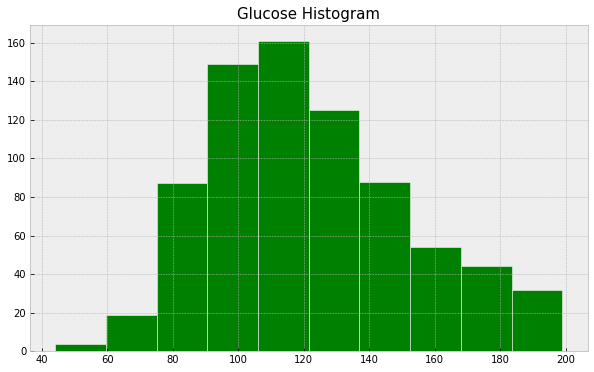

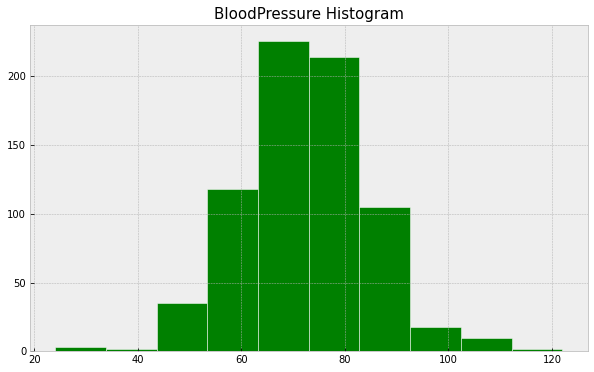

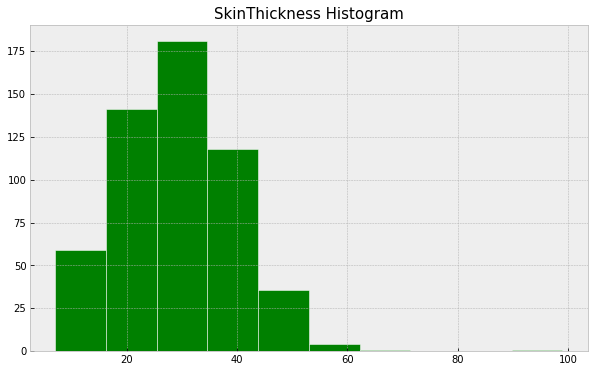

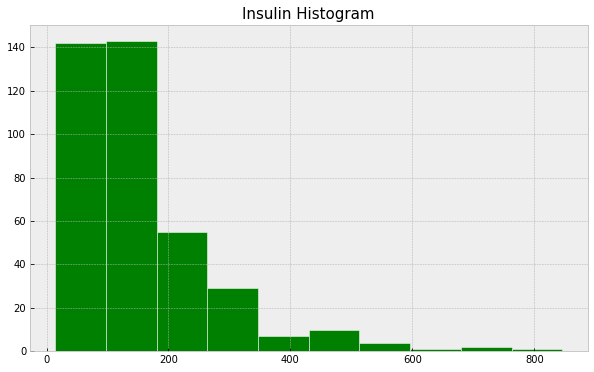

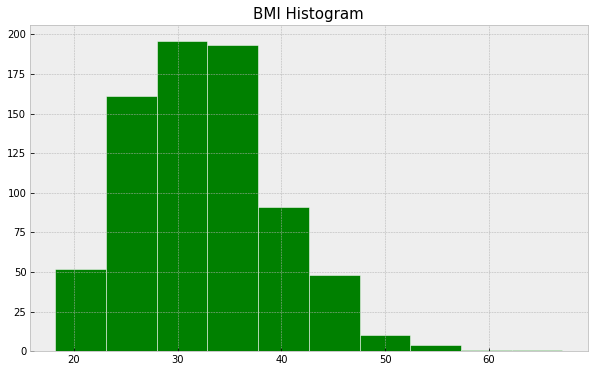

In [21]:
##plotting histogram fro each of the cols:

def plt_histogram(data_val,title_name):
    plt.figure(figsize=[10,6])
    plt.hist(data_val,color="green", edgecolor="white")
    #plt.grid(axis='y', alpha=0.75)
    plt.title(title_name,fontsize=15)
    plt.show()
    



plt_histogram(diabetes_df['Glucose'],'Glucose Histogram')
plt_histogram(diabetes_df['BloodPressure'],'BloodPressure Histogram')
plt_histogram(diabetes_df['SkinThickness'],'SkinThickness Histogram')
plt_histogram(diabetes_df['Insulin'],'Insulin Histogram')
plt_histogram(diabetes_df['BMI'],'BMI Histogram')


### 3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables

In [22]:
diabetes_df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

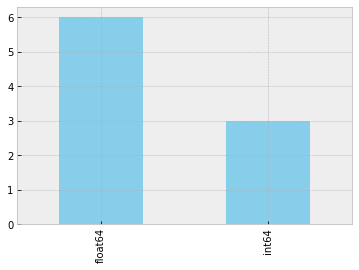

In [23]:
(diabetes_df.dtypes).value_counts().plot(kind = 'bar', color="skyblue")
plt.show()

### Project Task: Week 2
Data Exploration:

1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

3. Perform correlation analysis. Visually explore it using a heat map.

 

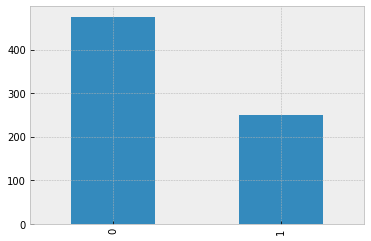

In [24]:
(diabetes_df_x.Outcome).value_counts().plot(kind = 'bar')
plt.show()

In [25]:
diabetes_df_x.Outcome.value_counts()

0    475
1    249
Name: Outcome, dtype: int64

In [26]:
round(diabetes_df_x.Outcome.value_counts(normalize = True)*100, 2)

0    65.61
1    34.39
Name: Outcome, dtype: float64

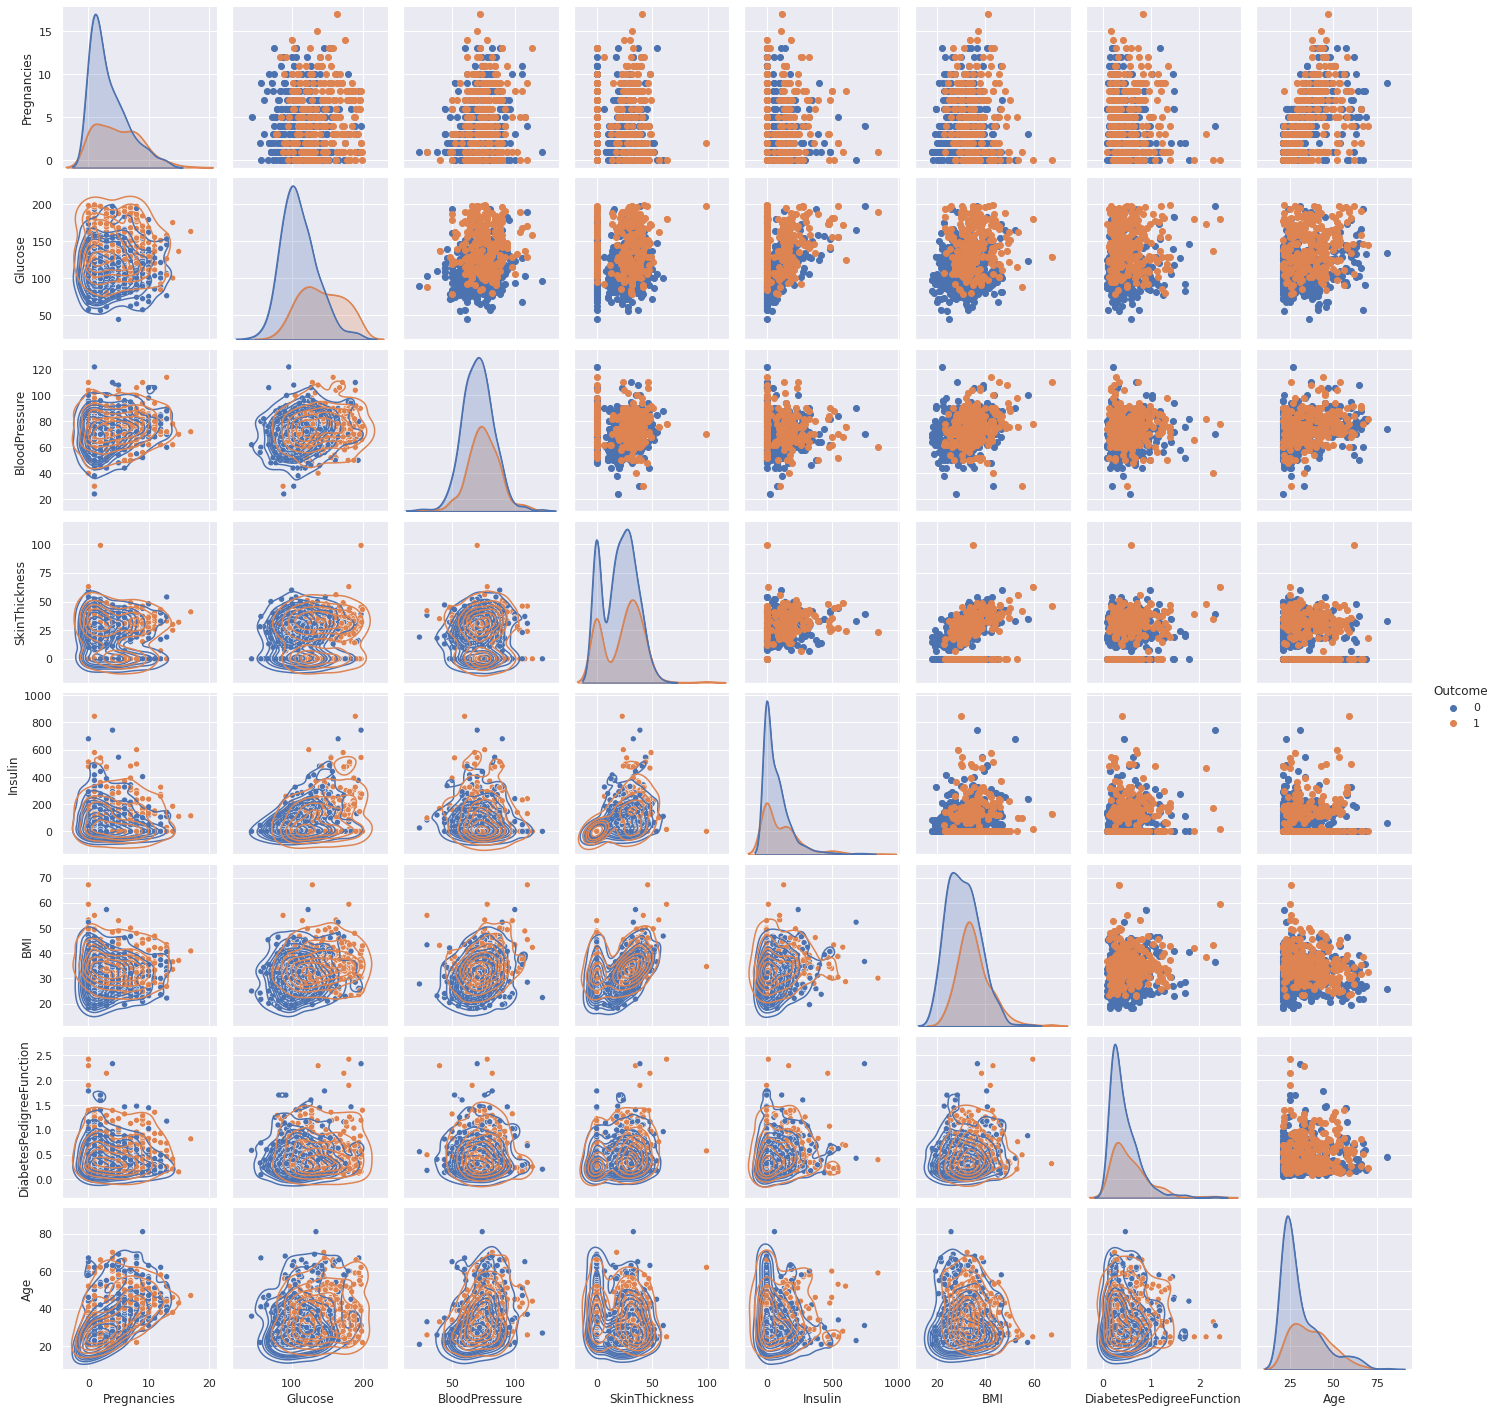

In [27]:
sns.set()
g = sns.pairplot(diabetes_df_x, hue = 'Outcome')
g.map_lower(sns.kdeplot)
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot)
plt.show()

In [28]:
round(diabetes_df_x.corr()['Outcome'][:], 3).sort_values(ascending = False)

Outcome                     1.000
Glucose                     0.488
BMI                         0.299
Age                         0.246
Pregnancies                 0.224
DiabetesPedigreeFunction    0.185
BloodPressure               0.167
Insulin                     0.145
SkinThickness               0.092
Name: Outcome, dtype: float64

In [29]:
def color_negative_red(value):
  """
  Colors elements in a dateframe
  green if positive and red if
  negative. Does not color NaN
  values.
  """

  if value < -0.1:
    color = 'red'
  elif value > 0.1:
    color = 'green'
  else:
    color = 'white'

  return 'color: %s' % color

In [30]:
round(diabetes_df_x.corr(), 3).style.applymap(color_negative_red)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.135000,0.210000,-0.096000,-0.080000,0.012000,-0.026000,0.557000,0.224000
Glucose,0.135000,1.000000,0.223000,0.074000,0.338000,0.223000,0.137000,0.264000,0.488000
BloodPressure,0.210000,0.223000,1.000000,0.012000,-0.047000,0.287000,-0.000000,0.325000,0.167000
SkinThickness,-0.096000,0.074000,0.012000,1.000000,0.421000,0.402000,0.176000,-0.129000,0.092000
Insulin,-0.080000,0.338000,-0.047000,0.421000,1.000000,0.192000,0.183000,-0.049000,0.145000
BMI,0.012000,0.223000,0.287000,0.402000,0.192000,1.000000,0.155000,0.021000,0.299000
DiabetesPedigreeFunction,-0.026000,0.137000,-0.000000,0.176000,0.183000,0.155000,1.000000,0.023000,0.185000
Age,0.557000,0.264000,0.325000,-0.129000,-0.049000,0.021000,0.023000,1.000000,0.246000
Outcome,0.224000,0.488000,0.167000,0.092000,0.145000,0.299000,0.185000,0.246000,1.000000


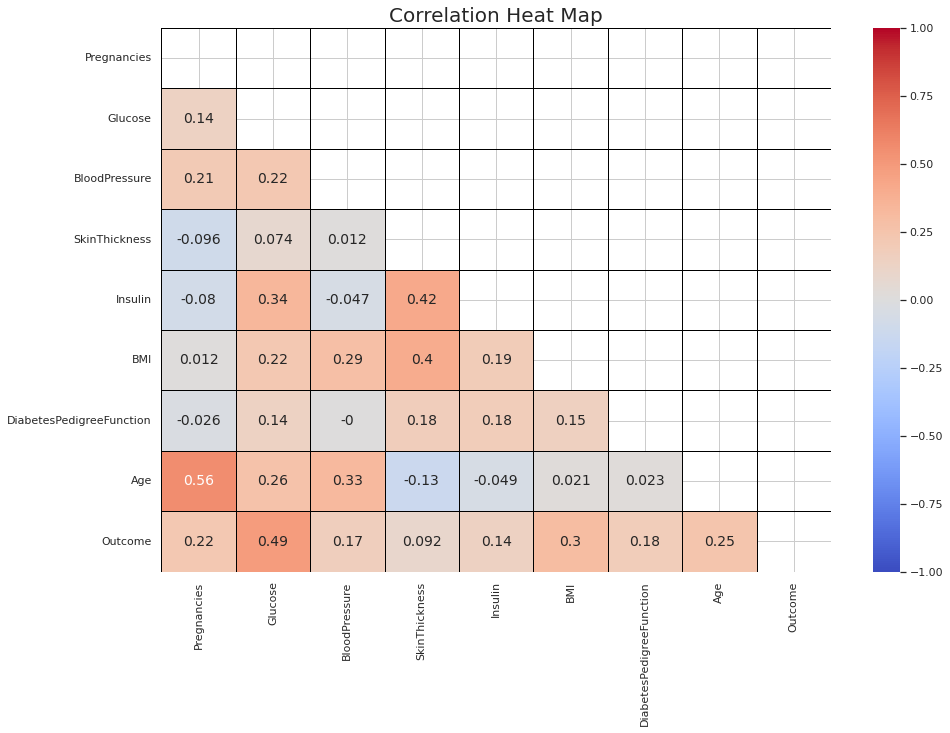

In [31]:
sns.set_style("whitegrid")

corr = diabetes_df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#kot = corr[corr>=.6]
plt.figure(figsize=(15,10))
sns.heatmap(round(diabetes_df_x.corr(), 3), cmap="coolwarm", vmin=-1, vmax=1, annot = True, mask = mask, linewidths=1, linecolor='black', annot_kws={"fontsize":14}).set_title('Correlation Heat Map', fontsize = 20)
plt.grid('on', )
plt.show()

### Project Task: Week 3
Data Modeling:

1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

In [32]:
diabetes_df_x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 

In [34]:
diabetes_df_x_scaled = scaler.fit_transform(diabetes_df_x)

In [35]:
diabetes_df_x_scaled = pd.DataFrame(diabetes_df_x_scaled, columns=diabetes_df_x.columns)

In [36]:
diabetes_df_x_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.353535,0.000000,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.292929,0.000000,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.000000,0.000000,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.232323,0.111111,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.353535,0.198582,0.509202,0.943638,0.200000,1.0


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
y = diabetes_df_x_scaled['Outcome']
x = diabetes_df_x_scaled.drop('Outcome', axis = 1)

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y)

In [40]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
625,0.058824,0.438710,0.571429,0.454545,0.156028,0.339468,0.059351,0.05
141,0.058824,0.593548,0.510204,0.505051,0.241135,0.392638,0.137062,0.05
281,0.000000,0.529032,0.612245,0.292929,0.254137,0.255624,0.188728,0.05
588,0.000000,0.567742,0.551020,0.000000,0.000000,0.290389,0.134500,0.00
323,0.294118,0.503226,0.632653,0.000000,0.000000,0.337423,0.090521,0.20


In [41]:
y_train.head()

625    0.0
141    0.0
281    0.0
588    0.0
323    0.0
Name: Outcome, dtype: float64

In [42]:
lr = LogisticRegression()

In [43]:
lr.fit(x_train, y_train)

LogisticRegression()

In [44]:
pred = lr.predict(x_test)

In [45]:
cnf_matrix = confusion_matrix(y_test, pred)

In [46]:
cnf_matrix

array([[82, 13],
       [21, 29]])

In [47]:
def sens_spec(cnf_matrix):

    total_cm = sum(sum(cnf_matrix))

    accuracy_clf = (cnf_matrix[0,0] + cnf_matrix[1,1]) / total_cm

    sensitivity_clf = cnf_matrix[0,0] / (cnf_matrix[0, 0] + cnf_matrix[0, 1])

    specificity_clf = cnf_matrix[1,1] / (cnf_matrix[1, 0] + cnf_matrix[1, 1])
    
    #print('accuracy of {} is {}'.format(accurac)
    return('Accuracy: {}'.format(round(accuracy_clf, 2)), 'Sensitivity: {}'.format(round(sensitivity_clf, 2)), 'Specificity: {}'.format(round(specificity_clf, 2)))

In [48]:
# Use score method to get accuracy of model
score = lr.score(x_test, y_test)
print(score)

0.7655172413793103


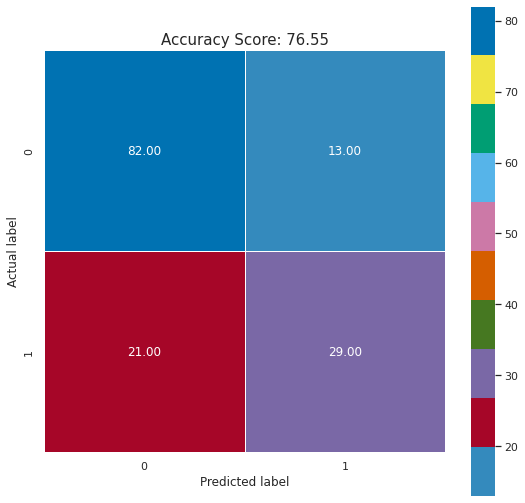

In [49]:
plt.figure(figsize=(9,9))
sns.heatmap(cnf_matrix, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = color_pal);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(score*100, 2))
plt.title(all_sample_title, size = 15);

In [50]:
print(sens_spec(cnf_matrix))
print()
print(classification_report(y_test, pred))

('Accuracy: 0.77', 'Sensitivity: 0.86', 'Specificity: 0.58')

              precision    recall  f1-score   support

         0.0       0.80      0.86      0.83        95
         1.0       0.69      0.58      0.63        50

    accuracy                           0.77       145
   macro avg       0.74      0.72      0.73       145
weighted avg       0.76      0.77      0.76       145



In [51]:
import os
from imblearn.over_sampling import SMOTE


In [52]:
dir(SMOTE)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_X_y',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_fit_resample',
 '_generate_samples',
 '_get_param_names',
 '_get_tags',
 '_in_danger_noise',
 '_make_samples',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sampling_strategy_docstring',
 '_sampling_type',
 '_validate_data',
 '_validate_estimator',
 'fit',
 'fit_resample',
 'get_params',
 'set_params']

In [53]:
os = SMOTE(random_state=0)

In [54]:
columns = x_train.columns

In [55]:
os_data_X,os_data_y = os.fit_resample(x, y)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Outcome'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of NEGATIVE in oversampled data",len(os_data_y[os_data_y['Outcome']==0]))
print("Number of POSITIVE",len(os_data_y[os_data_y['Outcome']==1]))
print("Proportion of NEGATIVE data in oversampled data is ",len(os_data_y[os_data_y['Outcome']==0])/len(os_data_X))
print("Proportion of POSITIVE data in oversampled data is ",len(os_data_y[os_data_y['Outcome']==1])/len(os_data_X))

length of oversampled data is  950
Number of NEGATIVE in oversampled data 475
Number of POSITIVE 475
Proportion of NEGATIVE data in oversampled data is  0.5
Proportion of POSITIVE data in oversampled data is  0.5


In [56]:
X_train, X_test, y_train, y_test = train_test_split(os_data_X,os_data_y, test_size=0.2, random_state=0)

### Project Task: Week 4

Data Modeling:

1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

Data Reporting:

2. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

a. Pie chart to describe the diabetic or non-diabetic population

b. Scatter charts between relevant variables to analyze the relationships

c. Histogram or frequency charts to analyze the distribution of the data

d. Heatmap of correlation analysis among the relevant variables

e. Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.

In [57]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [58]:
pip install scikit-plot


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [59]:
import scikitplot as skplt

In [60]:
names = ["Nearest Neighbors", "Logistic Regression", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    LogisticRegression(),
    SVC(kernel="linear", C=0.025, probability=True),
    SVC(gamma=2, C=1, probability=True),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

classifier:  Nearest Neighbors
77.89
('Accuracy: 0.77', 'Sensitivity: 0.86', 'Specificity: 0.58')

              precision    recall  f1-score   support

         0.0       0.85      0.67      0.75        93
         1.0       0.74      0.89      0.80        97

    accuracy                           0.78       190
   macro avg       0.79      0.78      0.78       190
weighted avg       0.79      0.78      0.78       190




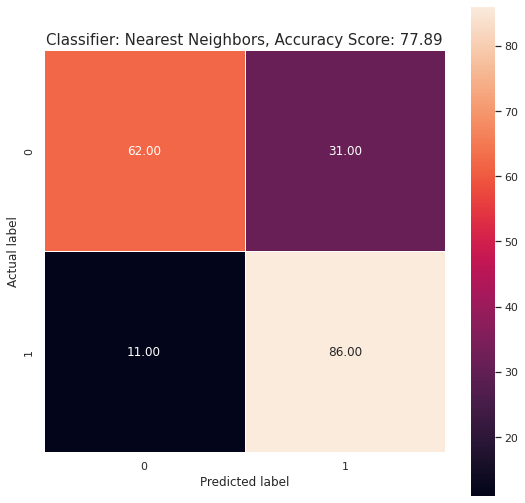

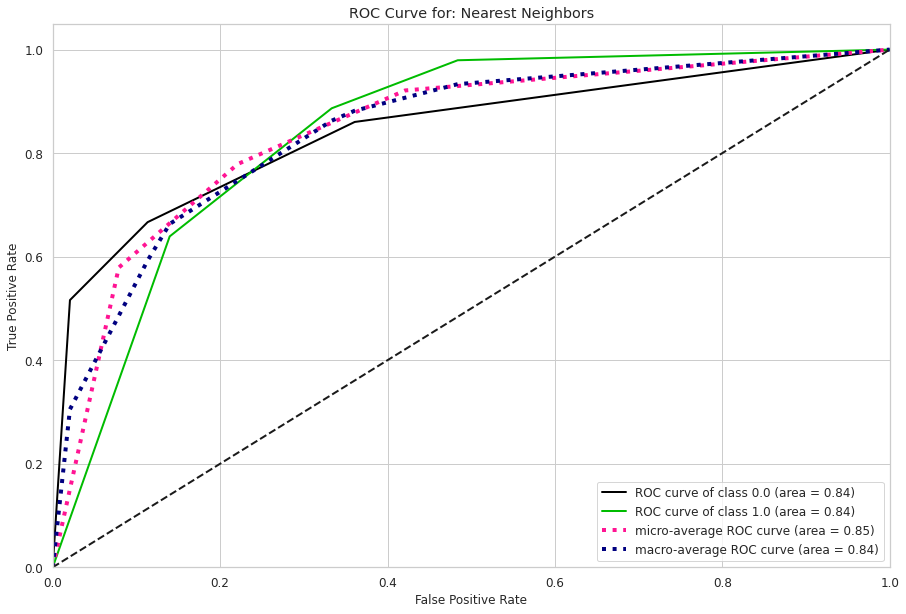

_____________________________________________________________________________________

classifier:  Logistic Regression
68.95
('Accuracy: 0.78', 'Sensitivity: 0.67', 'Specificity: 0.89')

              precision    recall  f1-score   support

         0.0       0.67      0.72      0.69        93
         1.0       0.71      0.66      0.68        97

    accuracy                           0.69       190
   macro avg       0.69      0.69      0.69       190
weighted avg       0.69      0.69      0.69       190




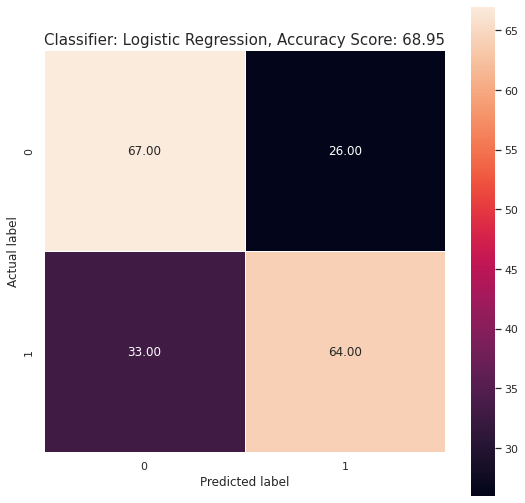

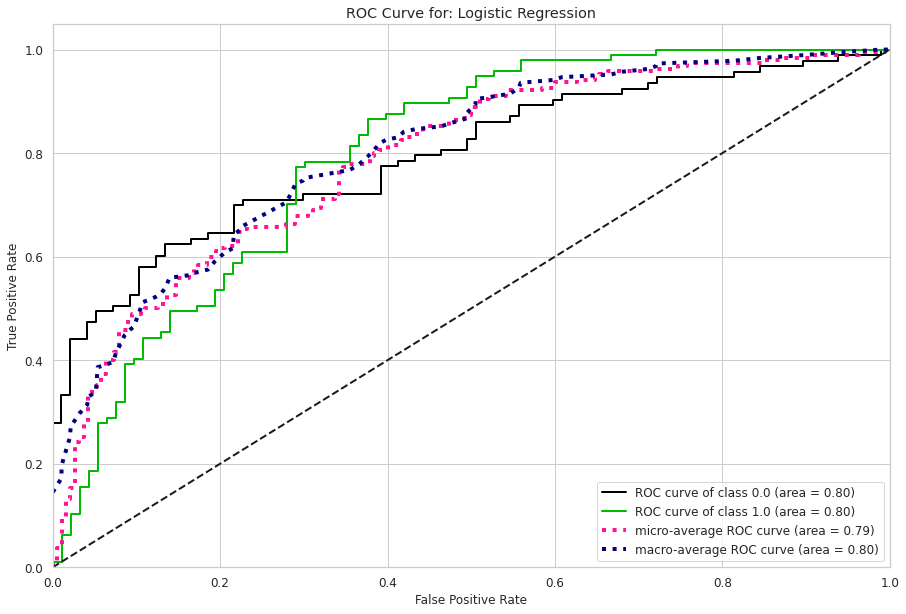

_____________________________________________________________________________________

classifier:  Linear SVM
69.47
('Accuracy: 0.69', 'Sensitivity: 0.72', 'Specificity: 0.66')

              precision    recall  f1-score   support

         0.0       0.67      0.74      0.70        93
         1.0       0.72      0.65      0.68        97

    accuracy                           0.69       190
   macro avg       0.70      0.70      0.69       190
weighted avg       0.70      0.69      0.69       190




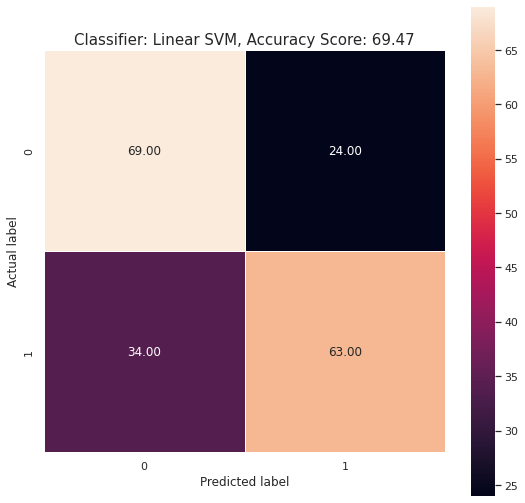

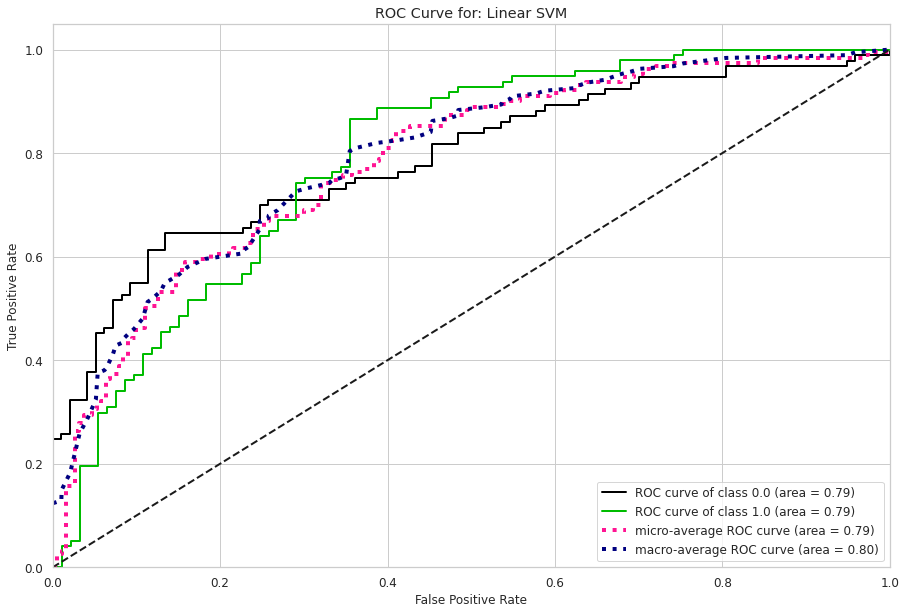

_____________________________________________________________________________________

classifier:  RBF SVM
75.26
('Accuracy: 0.69', 'Sensitivity: 0.74', 'Specificity: 0.65')

              precision    recall  f1-score   support

         0.0       0.77      0.70      0.73        93
         1.0       0.74      0.80      0.77        97

    accuracy                           0.75       190
   macro avg       0.75      0.75      0.75       190
weighted avg       0.75      0.75      0.75       190




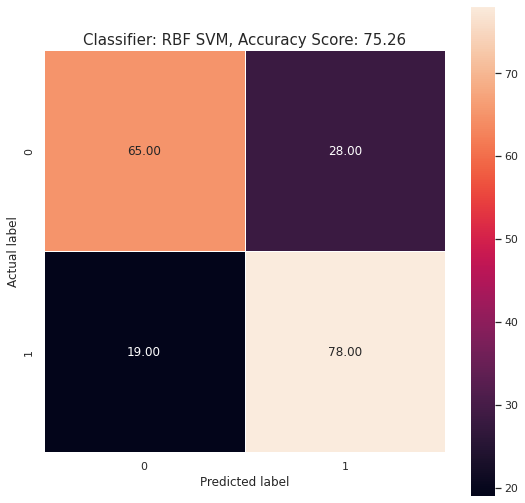

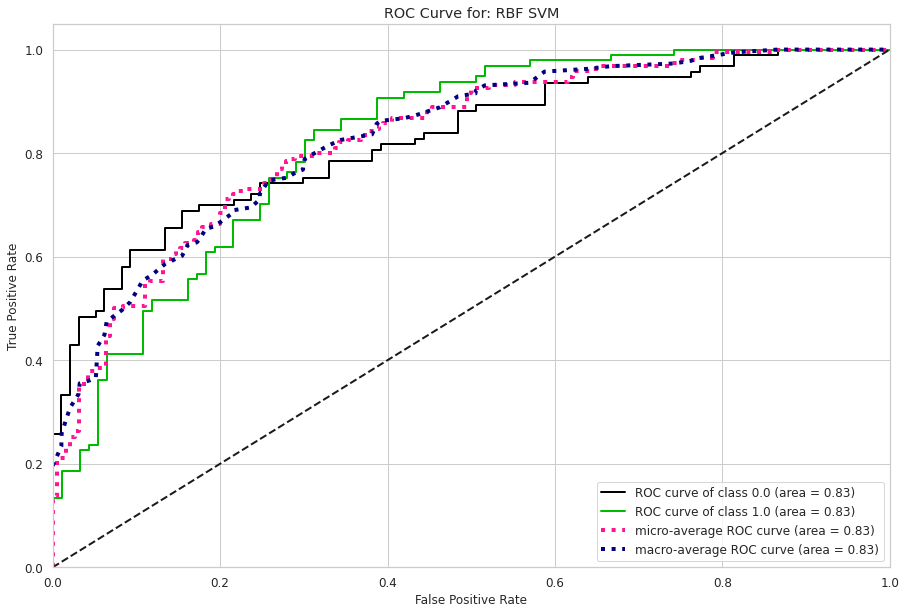

_____________________________________________________________________________________

classifier:  Gaussian Process
73.16
('Accuracy: 0.75', 'Sensitivity: 0.7', 'Specificity: 0.8')

              precision    recall  f1-score   support

         0.0       0.74      0.70      0.72        93
         1.0       0.73      0.76      0.74        97

    accuracy                           0.73       190
   macro avg       0.73      0.73      0.73       190
weighted avg       0.73      0.73      0.73       190




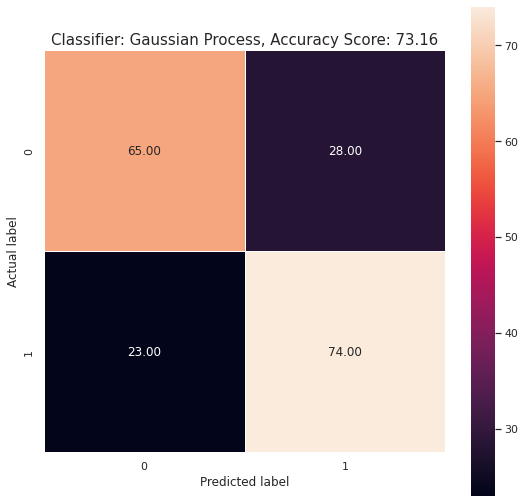

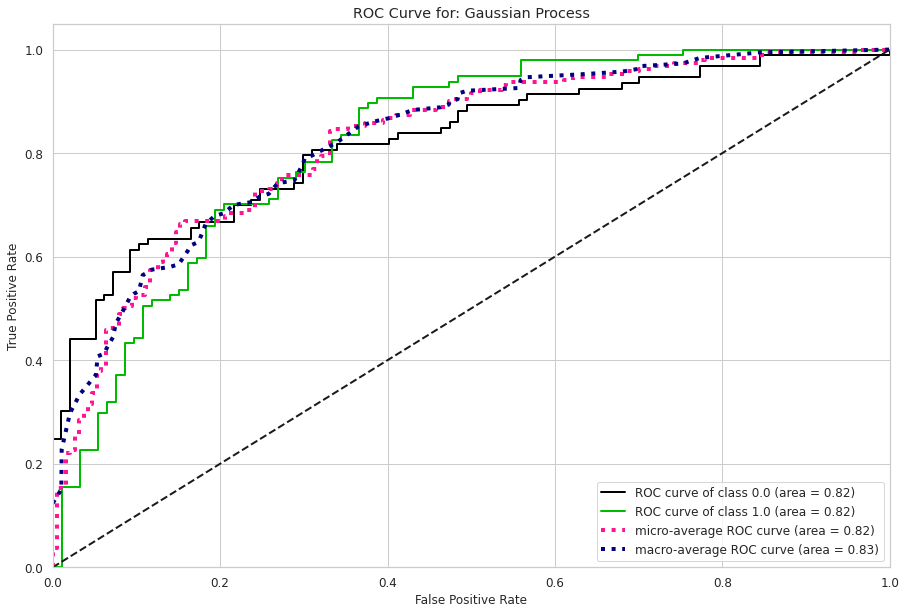

_____________________________________________________________________________________

classifier:  Decision Tree
74.21
('Accuracy: 0.73', 'Sensitivity: 0.7', 'Specificity: 0.76')

              precision    recall  f1-score   support

         0.0       0.78      0.67      0.72        93
         1.0       0.72      0.81      0.76        97

    accuracy                           0.74       190
   macro avg       0.75      0.74      0.74       190
weighted avg       0.75      0.74      0.74       190




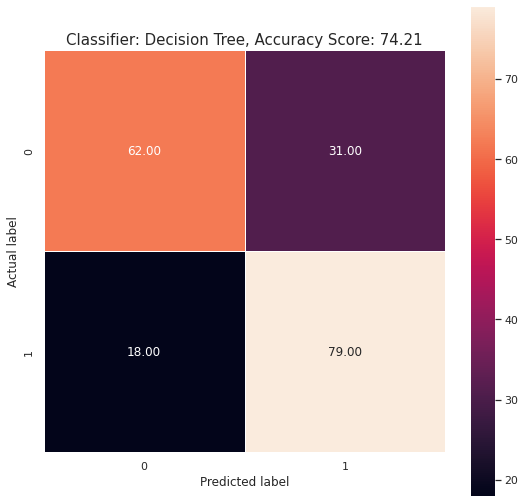

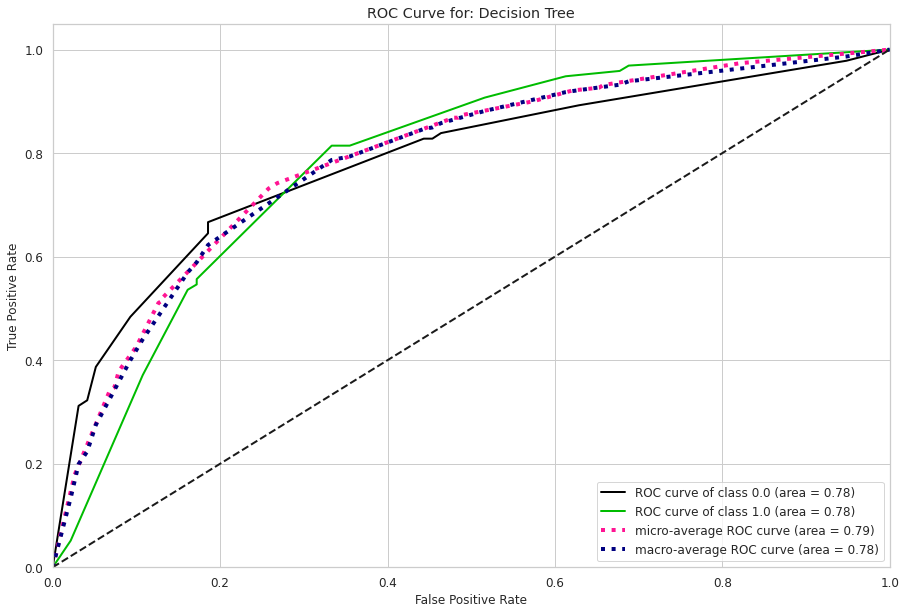

_____________________________________________________________________________________

classifier:  Random Forest
74.74
('Accuracy: 0.74', 'Sensitivity: 0.67', 'Specificity: 0.81')

              precision    recall  f1-score   support

         0.0       0.78      0.67      0.72        93
         1.0       0.72      0.82      0.77        97

    accuracy                           0.75       190
   macro avg       0.75      0.75      0.75       190
weighted avg       0.75      0.75      0.75       190




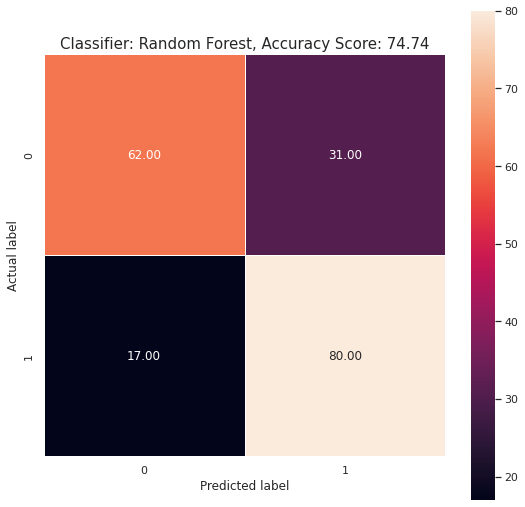

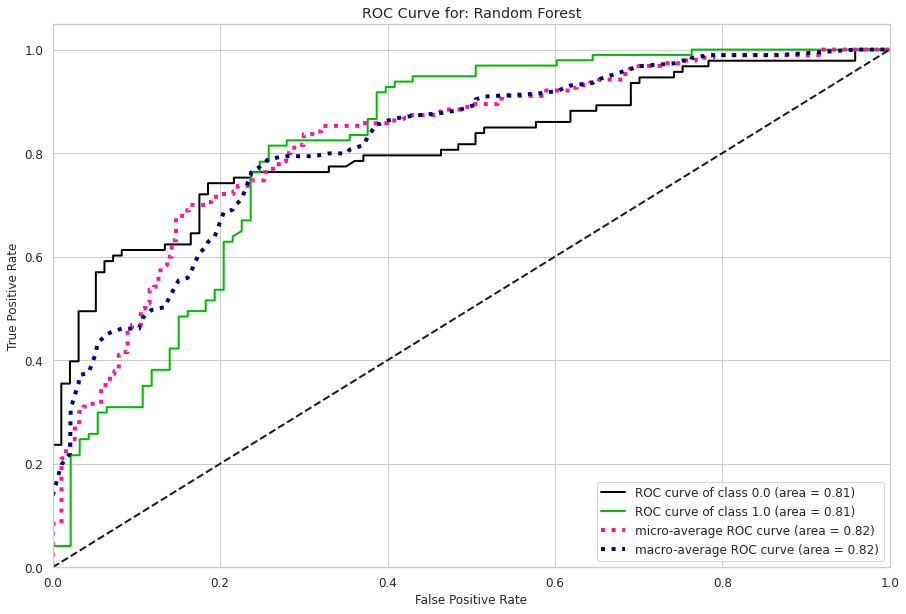

_____________________________________________________________________________________

classifier:  Neural Net
68.95
('Accuracy: 0.75', 'Sensitivity: 0.67', 'Specificity: 0.82')

              precision    recall  f1-score   support

         0.0       0.67      0.71      0.69        93
         1.0       0.71      0.67      0.69        97

    accuracy                           0.69       190
   macro avg       0.69      0.69      0.69       190
weighted avg       0.69      0.69      0.69       190




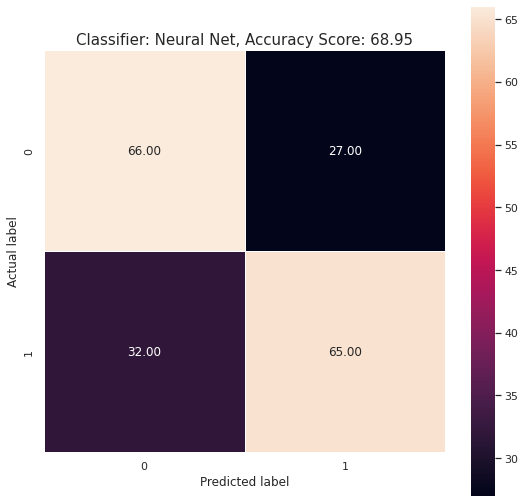

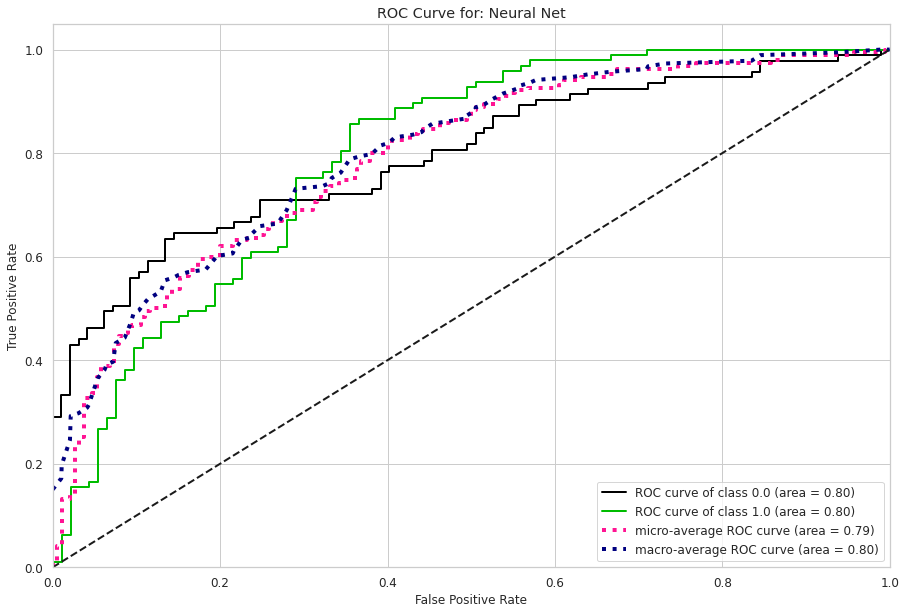

_____________________________________________________________________________________

classifier:  AdaBoost
75.79
('Accuracy: 0.69', 'Sensitivity: 0.71', 'Specificity: 0.67')

              precision    recall  f1-score   support

         0.0       0.78      0.70      0.74        93
         1.0       0.74      0.81      0.77        97

    accuracy                           0.76       190
   macro avg       0.76      0.76      0.76       190
weighted avg       0.76      0.76      0.76       190




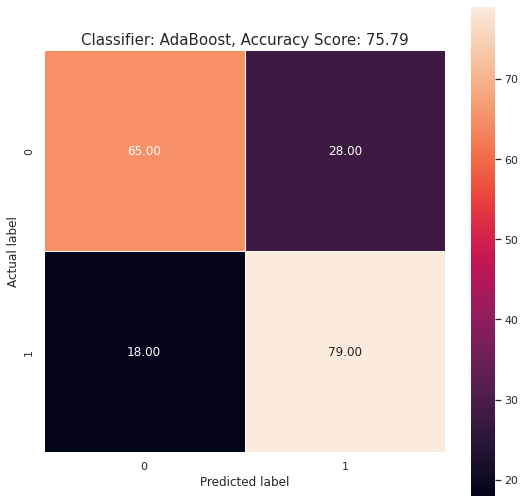

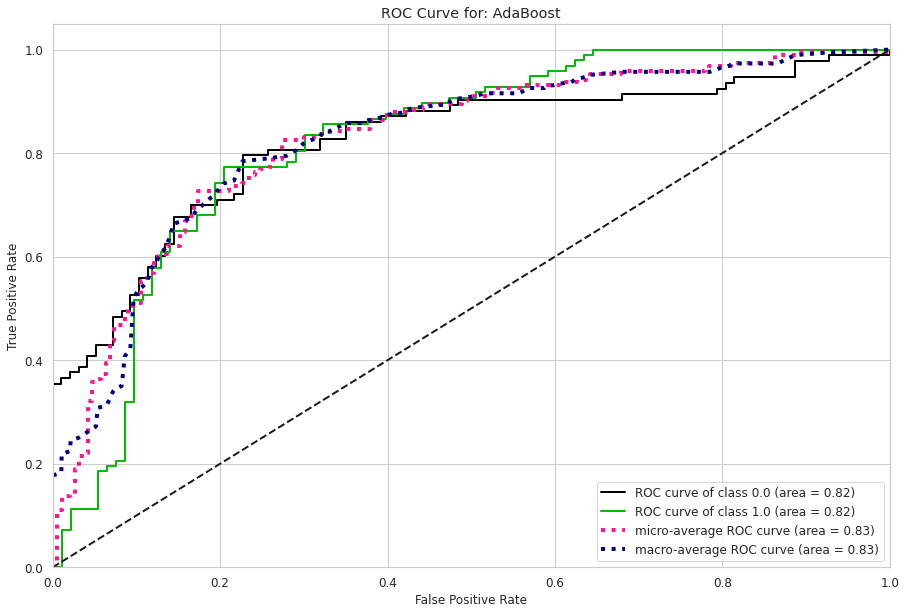

_____________________________________________________________________________________

classifier:  Naive Bayes
70.53
('Accuracy: 0.76', 'Sensitivity: 0.7', 'Specificity: 0.81')

              precision    recall  f1-score   support

         0.0       0.68      0.75      0.71        93
         1.0       0.74      0.66      0.70        97

    accuracy                           0.71       190
   macro avg       0.71      0.71      0.70       190
weighted avg       0.71      0.71      0.70       190




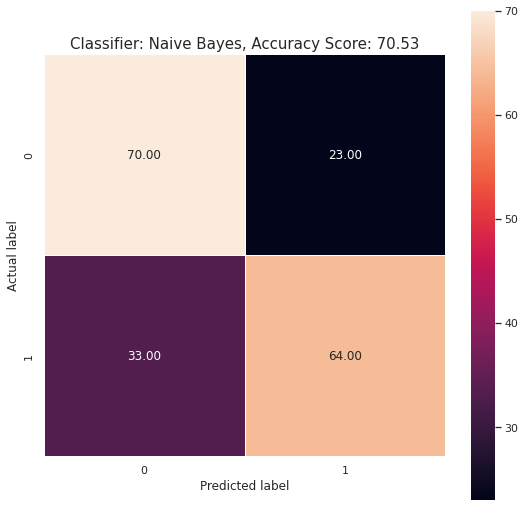

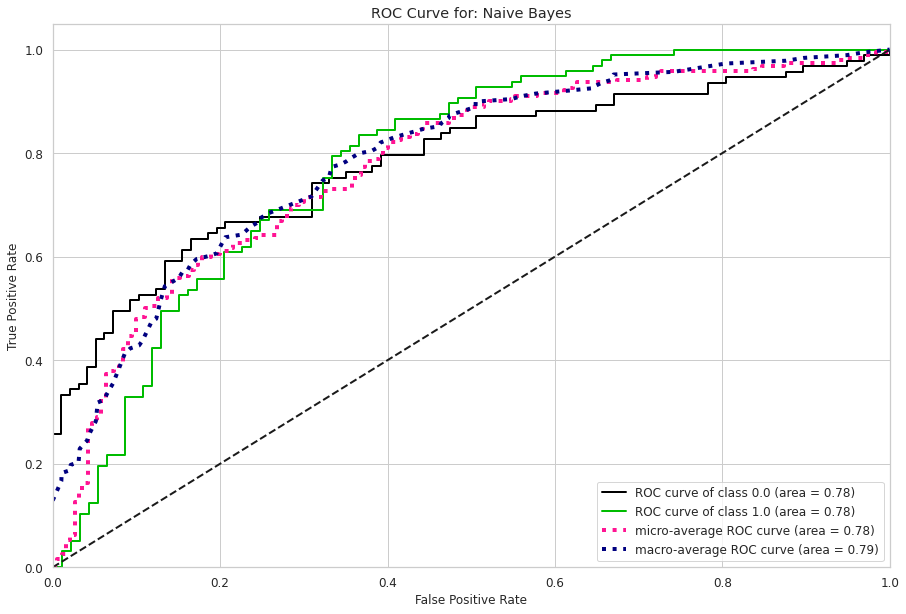

_____________________________________________________________________________________

classifier:  QDA
67.37
('Accuracy: 0.71', 'Sensitivity: 0.75', 'Specificity: 0.66')

              precision    recall  f1-score   support

         0.0       0.64      0.74      0.69        93
         1.0       0.71      0.61      0.66        97

    accuracy                           0.67       190
   macro avg       0.68      0.68      0.67       190
weighted avg       0.68      0.67      0.67       190




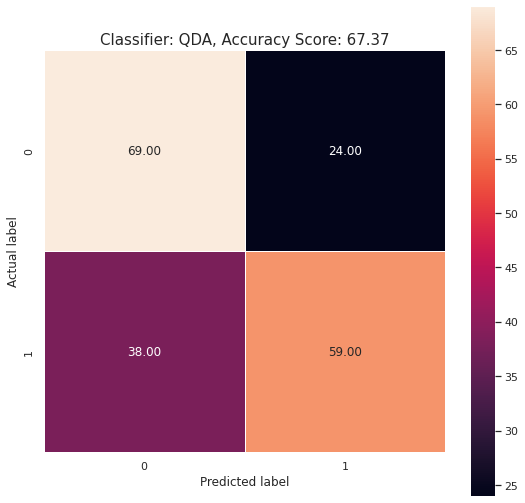

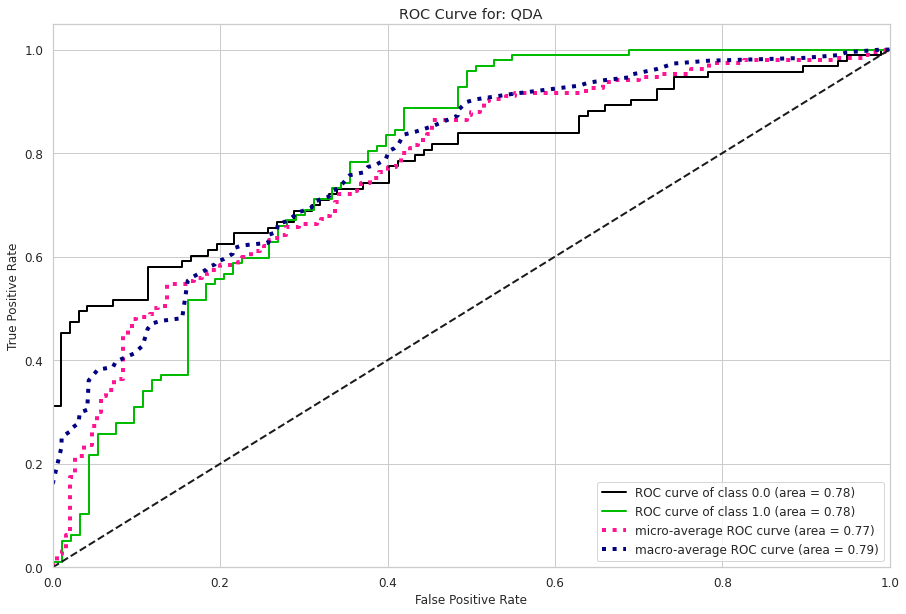

_____________________________________________________________________________________



In [61]:
# iterate over classifiers
for name, clf in zip(names, classifiers):
        #ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        print('classifier: ', name)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        pred = clf.predict(X_test)
        prob = clf.predict_proba(X_test)
        print(round(score*100, 2))
        print(sens_spec(cnf_matrix))
        print()
        
        cnf_matrix = confusion_matrix(y_test, pred)
        plt.figure(figsize=(9,9))
        sns.heatmap(cnf_matrix, annot=True, fmt=".2f", linewidths=.5, square = True, color = "red")
        plt.ylabel('Actual label');
        plt.xlabel('Predicted label');
        #all_sample_title = 'Accuracy Score: {0}'.format(round(score*100, 2))
        all_sample_title ='Classifier: {}, Accuracy Score: {}'.format(name, round(score*100, 2))
        plt.title(all_sample_title, size = 15);

        #print()
        print(classification_report(y_test, pred))
        print()

        skplt.metrics.plot_roc_curve(y_test, prob, figsize = (15, 10), title = 'ROC Curve for: {}'.format(name))
        plt.show()
        print('_____________________________________________________________________________________')
        print()

In [62]:
#import random
np.random.seed(1000)
randomlist = []
for i in range(0,10):
    n = np.random.randint(1,len(X_test))
    randomlist.append(n)
print(randomlist)

[180, 88, 72, 95, 93, 2, 129, 90, 46, 41]


In [63]:
list(X_test.iloc[180])

[0.058823529411764705,
 0.6387096774193548,
 0.510204081632653,
 0.22222222222222224,
 0.07210401891252954,
 0.16359918200409002,
 0.07600341588385995,
 0.0]

In [64]:
y_test.iloc[180]['Outcome']

0.0

In [65]:
pre_out = []
out = []

for i in randomlist:
    data_in = [list(X_test.iloc[i])]
    data_in = np.around(data_in, 2)
    pre_data_out = lr.predict(data_in)
    data_out = y_test.iloc[i]['Outcome']
    
    mylist = [i, data_in, pre_data_out, data_out]
    print(*mylist,sep='\n')
    print('------------------------')
    
    pre_out.append(pre_data_out)
    out.append(data_out)
    


180
[[0.06 0.64 0.51 0.22 0.07 0.16 0.08 0.  ]]
[0.]
0.0
------------------------
88
[[0.06 0.36 0.43 0.29 0.23 0.28 0.16 0.35]]
[0.]
0.0
------------------------
72
[[0.12 0.54 0.41 0.42 0.   0.45 0.44 0.05]]
[0.]
0.0
------------------------
95
[[0.12 0.5  0.53 0.27 0.24 0.36 0.17 0.08]]
[0.]
0.0
------------------------
93
[[0.42 0.97 0.65 0.   0.   0.48 0.13 0.34]]
[1.]
1.0
------------------------
2
[[0.18 0.63 0.57 0.15 0.   0.29 0.05 0.7 ]]
[0.]
0.0
------------------------
129
[[0.1  0.51 0.44 0.29 0.23 0.31 0.32 0.15]]
[0.]
1.0
------------------------
90
[[0.41 0.92 0.27 0.33 0.46 0.32 0.32 0.22]]
[1.]
1.0
------------------------
46
[[0.12 0.5  0.29 0.43 0.19 0.37 0.32 0.12]]
[0.]
0.0
------------------------
41
[[0.06 0.51 0.37 0.34 0.19 0.34 0.29 0.14]]
[0.]
1.0
------------------------


In [66]:
svc = SVC(gamma=2, C=1, probability=True)
svc.fit(X_train, y_train)

SVC(C=1, gamma=2, probability=True)

In [67]:
pre_out = []
out = []

for i in randomlist:
    data_in = [list(X_test.iloc[i])]
    data_in = np.around(data_in, 2)
    pre_data_out = svc.predict(data_in)
    data_out = y_test.iloc[i]['Outcome']
    
    mylist = [i, data_in, pre_data_out, data_out]
    print(*mylist,sep='\n')
    print('------------------------')
    
    pre_out.append(pre_data_out)
    out.append(data_out)

180
[[0.06 0.64 0.51 0.22 0.07 0.16 0.08 0.  ]]
[0.]
0.0
------------------------
88
[[0.06 0.36 0.43 0.29 0.23 0.28 0.16 0.35]]
[0.]
0.0
------------------------
72
[[0.12 0.54 0.41 0.42 0.   0.45 0.44 0.05]]
[1.]
0.0
------------------------
95
[[0.12 0.5  0.53 0.27 0.24 0.36 0.17 0.08]]
[0.]
0.0
------------------------
93
[[0.42 0.97 0.65 0.   0.   0.48 0.13 0.34]]
[1.]
1.0
------------------------
2
[[0.18 0.63 0.57 0.15 0.   0.29 0.05 0.7 ]]
[1.]
0.0
------------------------
129
[[0.1  0.51 0.44 0.29 0.23 0.31 0.32 0.15]]
[1.]
1.0
------------------------
90
[[0.41 0.92 0.27 0.33 0.46 0.32 0.32 0.22]]
[1.]
1.0
------------------------
46
[[0.12 0.5  0.29 0.43 0.19 0.37 0.32 0.12]]
[1.]
0.0
------------------------
41
[[0.06 0.51 0.37 0.34 0.19 0.34 0.29 0.14]]
[1.]
1.0
------------------------
